In [66]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

In [158]:
%run ./ml_model_init.ipynb

## Baseline Model


In [160]:

xg_data= data[(data['minutes_5'] >= 300) & (data['position'] != 'GK')][['position', 'minutes_3', 'minutes_5', 'team_h_difficulty', 'team_a_difficulty', 'ict_index_3',  'ict_index_5',
                                                                     'influence_3', 'influence_5', 'creativity_3', 'creativity_5', 'threat_3', 'threat_5', 'was_home', 'xG', 'xG_3',
                                                                      'xG_5', 'expected_goals_3', 'expected_goals_5', 'goals_scored_3', 'whh', 'whd', 'wha']]

xg_data_tar = data_tar[(data_tar['minutes_5'] >= 300) & (data_tar['position'] != 'GK')][['position', 'minutes_3', 'minutes_5', 'team_h_difficulty', 'team_a_difficulty', 'ict_index_3',
                                                                                         'ict_index_5', 'influence_3', 'influence_5', 'creativity_3', 'creativity_5', 'threat_3',
                                                                                        'threat_5', 'was_home', 'xG', 'xG_3', 'xG_5', 'expected_goals_3', 'expected_goals_5',
                                                                                        'goals_scored_3','whh', 'whd', 'wha']]
# players = data_225 #.drop('position', axis=1) #  & (data['position'] == 'FWD')
# # players


In [233]:
xg_data_tar['xG']

21      0.000000
70      0.149559
81      0.508660
92      0.071084
111     0.068399
          ...   
2223    0.086106
2238    0.000000
2249    0.000000
2285    0.121993
2313    0.000000
Name: xG, Length: 106, dtype: float64

c:\Users\Ilyas\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='xG'>

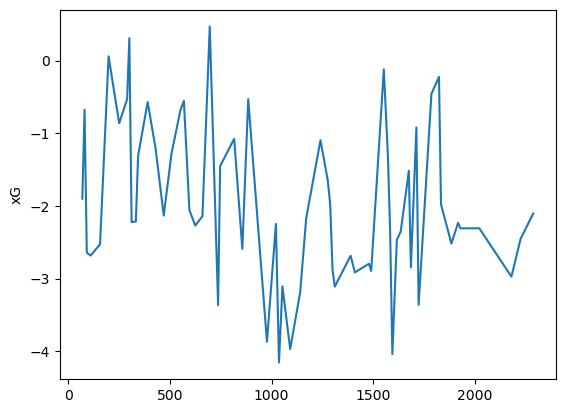

In [238]:
import seaborn as sns
import numpy as np



sns.lineplot(np.log(xg_data_tar['xG']))

In [161]:

xg = xg_data[['xG']]
feats = xg_data.drop('xG', axis=1)
feats_train, feats_test, xg_train, xg_test = train_test_split(feats, xg , test_size=0.2, random_state=42)

In [118]:
# Split the gk data into train and test sets
# for_splits = split_data(fwd_player_data)

#### Linear Model


In [163]:

lin_reg = Linear_regression(feats_train, feats_test, xg_train, xg_test)

# Store the model evaluation details in a DataFrame
evaluation_stats = pd.DataFrame({"lin_reg": [lin_reg['train_MAE'], lin_reg['test_MAE'], lin_reg['train_RMSE'], lin_reg['test_RMSE'], lin_reg['cv_rmse'], lin_reg['R2_train'], lin_reg['R2_test']]},
                                                        index=(['train_MAE','test_MAE', 'train_RMSE', 'test_RMSE', 'cv_rmse', 'R2_train', 'R2_test']))

evaluation_stats

Training set RMSE: 0.24605779405611353
Test set RMSE: 0.2384525308640639
Training set R2: 0.21212299242411004
Test set R2: 0.20024574224983793


,lin_reg
train_MAE,0.146681
test_MAE,0.150710
train_RMSE,0.246058
test_RMSE,0.238453
cv_rmse,0.247332
R2_train,0.212123
R2_test,0.200246


#### DecisionTree Model


In [269]:
dt_reg = DecisionTreeRegression(feats_train, feats_test, xg_train, xg_test)

# Store the model evaluation details in a DataFrame
evaluation_stats = evaluation_stats.assign(dt_reg = [dt_reg['train_MAE'], dt_reg['test_MAE'], dt_reg['train_RMSE'], dt_reg['test_RMSE'], dt_reg['cv_rmse'], dt_reg['R2_train'], dt_reg['R2_test']])

evaluation_stats



,lin_reg,dt_reg,rf_reg,xgb_reg,VarT_lin_reg,VarT_dt_reg,VarT_rf_reg,VarT_xgb_reg
train_MAE,0.146681,1.390979e-17,0.126866,0.139370,0.146681,1.402358e-17,0.127193,0.140721
test_MAE,0.150710,1.924164e-01,0.154446,0.152825,0.150710,1.973210e-01,0.153093,0.152640
train_RMSE,0.246058,3.027264e-17,0.201509,0.226474,0.246058,3.077802e-17,0.202741,0.229293
test_RMSE,0.238453,3.408247e-01,0.244199,0.241805,0.238453,3.567820e-01,0.243725,0.241289
cv_rmse,0.247332,3.550392e-01,0.251674,0.248284,0.247332,3.566537e-01,0.252185,0.249193
R2_train,0.212123,1.000000e+00,0.471587,0.332547,0.212123,1.000000e+00,0.465105,0.315827
R2_test,0.200246,-6.338594e-01,0.161232,0.177597,0.200246,-7.904354e-01,0.164490,0.181103


#### RandomForest Model


In [165]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
rf_reg = RandomForestRegression(feats_train, feats_test, xg_train, xg_test, hyperparameters)

# Store the model evaluation details in a DataFrame
evaluation_stats = evaluation_stats.assign(rf_reg = [rf_reg['train_MAE'], rf_reg['test_MAE'], rf_reg['train_RMSE'], rf_reg['test_RMSE'], rf_reg['cv_rmse'], rf_reg['R2_train'], rf_reg['R2_test']])

evaluation_stats

,lin_reg,dt_reg,rf_reg
train_MAE,0.146681,1.390979e-17,0.126866
test_MAE,0.150710,1.914486e-01,0.154446
train_RMSE,0.246058,3.027264e-17,0.201509
test_RMSE,0.238453,3.420553e-01,0.244199
cv_rmse,0.247332,3.549051e-01,0.251674
R2_train,0.212123,1.000000e+00,0.471587
R2_test,0.200246,-6.456795e-01,0.161232


#### XgBoost Model


In [166]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
xgb_reg = XGBoostRegression(feats_train, feats_test, xg_train, xg_test, hyperparameters)

# Store the model evaluation details in a DataFrame
evaluation_stats = evaluation_stats.assign(xgb_reg = [xgb_reg['train_MAE'], xgb_reg['test_MAE'], xgb_reg['train_RMSE'], xgb_reg['test_RMSE'], xgb_reg['cv_rmse'], xgb_reg['R2_train'], xgb_reg['R2_test']])
evaluation_stats

,lin_reg,dt_reg,rf_reg,xgb_reg
train_MAE,0.146681,1.390979e-17,0.126866,0.139370
test_MAE,0.150710,1.914486e-01,0.154446,0.152825
train_RMSE,0.246058,3.027264e-17,0.201509,0.226474
test_RMSE,0.238453,3.420553e-01,0.244199,0.241805
cv_rmse,0.247332,3.549051e-01,0.251674,0.248284
R2_train,0.212123,1.000000e+00,0.471587,0.332547
R2_test,0.200246,-6.456795e-01,0.161232,0.177597


# Feature engineering


### VarianceThreshold


In [216]:
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

# Feature preprocessing pipeline
# Split into numerical and categorical columns
bool_cols = feats_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = feats_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors in a column transformer
col_trans = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, bool_cols),
        ('cat', categorical_transformer, categorical_cols),
    ]
)

# Scale and remove low-variance features
preprocessor = Pipeline(steps=[
    ('col_trans', col_trans),
    ('var_threshold', VarianceThreshold(threshold=0.1))
])

# Apply the pipeline to the training data
# pipeline.fit(feats_train)
# preprocessed_train = pipeline.transform(feats_train)
# preprocessed_test = pipeline.transform(feats_test)


# preprocessor = Pipeline(steps=[
#     ('scaler', StandardScaler()),
#     ('var_threshold', VarianceThreshold(threshold=0.1))
# ])




#### Model(VT)


In [ ]:
def scores(model, feats_train, feats_test, xg_train, xg_test):
    # fit the transofrmer on the train data
    model.fit(feats_train, xg_train)

    support = model.regressor_.named_steps['preprocessor'].named_steps['var_threshold'].get_support()
    # print(f"Selected features: {feats_train.columns[support]}")
    print(len(support), len(feats_train.columns))

    # With the model fitted, we can predict the total_points given the feature_train and feature_test set
    pred_train = model.predict(feats_train)
    pred_test = model.predict(feats_test)

    # Evaluate the performance of the model on both sets using the mean absolute error
    train_MAE = mean_absolute_error(xg_train, pred_train)
    test_MAE = mean_absolute_error(xg_test, pred_test)

    # Evaluate the performance of the model on both sets using the mean square error
    train_MSE = mean_squared_error(xg_train, pred_train)
    test_MSE = mean_squared_error(xg_test, pred_test)

    # Evaluate the performance of the model on both sets using the root mean square error
    train_RMSE = mean_squared_error(xg_train, pred_train, squared=False)
    test_RMSE = mean_squared_error(xg_test, pred_test, squared=False)

    # Get the score of the model or the coeeficient of determination i.e how much of the target value can be explained by the model.
    # In this case, 0.6 implies that 60% of the variations in the target value can be explained by the model and 40% is not explainable
    R2_train = model.score(feats_train, xg_train)
    R2_test = model.score(feats_test, xg_test)

    # If the test error significantly differs from the train error, then there is either overfitting or underfitting
    # RMSE, just like the squared loss function that it derives from, effectively penalizes larger errors more severely.
    print('Training set RMSE: {}'.format(train_RMSE))
    print('Test set RMSE: {}'.format(test_RMSE))

    print('Training set R2: {}'.format(R2_train))
    print('Test set R2: {}'.format(R2_test))

    # Carry out cross validation of the model.
    # The evaluation method is the root mean square error
    # The method expects a utility function (greater is better) and so the scoring function is the opposite of the the RMSE. Hence the -ve
    tree_rmses = -cross_val_score(model, feats_train, xg_train,
                                    scoring="neg_root_mean_squared_error", cv=10)

    return {'train_MAE': train_MAE, 'test_MAE': test_MAE, 'train_MSE': train_MSE, 'test_MSE': test_MSE, 'train_RMSE': train_RMSE, 'test_RMSE': test_RMSE, 'cv_rmse': tree_rmses.mean(), 'R2_train': R2_train, 'R2_test': R2_test}


##### Linear Model


In [ ]:

# Full pipeline including the regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# TransformedTargetRegressor for target scaling
model = TransformedTargetRegressor(
    regressor=pipeline,
    transformer=StandardScaler()
)

# Model predictions
VarT_lin_reg = scores(model, feats_train, feats_test, xg_train, xg_test)
# Store the model evaluation details in a DataFrame
evaluation_stats = evaluation_stats.assign(VarT_lin_reg =  [VarT_lin_reg['train_MAE'], VarT_lin_reg['test_MAE'],  VarT_lin_reg['train_RMSE'], VarT_lin_reg['test_RMSE'], VarT_lin_reg['cv_rmse'], VarT_lin_reg['R2_train'], VarT_lin_reg['R2_test']])

evaluation_stats

23 22
Training set RMSE: 0.24605779405611353
Test set RMSE: 0.2384525308640639
Training set R2: 0.21212299242411004
Test set R2: 0.20024574224983793


,lin_reg,dt_reg,rf_reg,xgb_reg,VarT_lin_reg
train_MAE,0.146681,1.390979e-17,0.126866,0.139370,0.146681
test_MAE,0.150710,1.914486e-01,0.154446,0.152825,0.150710
train_RMSE,0.246058,3.027264e-17,0.201509,0.226474,0.246058
test_RMSE,0.238453,3.420553e-01,0.244199,0.241805,0.238453
cv_rmse,0.247332,3.549051e-01,0.251674,0.248284,0.247332
R2_train,0.212123,1.000000e+00,0.471587,0.332547,0.212123
R2_test,0.200246,-6.456795e-01,0.161232,0.177597,0.200246


##### DecisionTree Model


In [ ]:
# Full pipeline including the regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])

# TransformedTargetRegressor for target scaling
dt_model = TransformedTargetRegressor(
    regressor=pipeline,
    transformer=StandardScaler()
)




VarT_dt_reg = scores(dt_model, feats_train, feats_test, xg_train, xg_test)

# Store the model evaluation details in a DataFrame
evaluation_stats = evaluation_stats.assign(VarT_dt_reg = [VarT_dt_reg['train_MAE'], VarT_dt_reg['test_MAE'], VarT_dt_reg['train_RMSE'], VarT_dt_reg['test_RMSE'], VarT_dt_reg['cv_rmse'], VarT_dt_reg['R2_train'], VarT_dt_reg['R2_test']])

evaluation_stats



23 22
Training set RMSE: 3.077801774126355e-17
Test set RMSE: 0.3567820363988533
Training set R2: 1.0
Test set R2: -0.7904353681790259


,lin_reg,dt_reg,rf_reg,xgb_reg,VarT_lin_reg,VarT_dt_reg
train_MAE,0.146681,1.390979e-17,0.126866,0.139370,0.146681,1.402358e-17
test_MAE,0.150710,1.914486e-01,0.154446,0.152825,0.150710,1.973210e-01
train_RMSE,0.246058,3.027264e-17,0.201509,0.226474,0.246058,3.077802e-17
test_RMSE,0.238453,3.420553e-01,0.244199,0.241805,0.238453,3.567820e-01
cv_rmse,0.247332,3.549051e-01,0.251674,0.248284,0.247332,3.566537e-01
R2_train,0.212123,1.000000e+00,0.471587,0.332547,0.212123,1.000000e+00
R2_test,0.200246,-6.456795e-01,0.161232,0.177597,0.200246,-7.904354e-01


##### RandomForest Model


In [ ]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}

# Full pipeline including the regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
                        n_estimators=hyperparameters['n_estimators'],
                        max_depth=hyperparameters['max_depth'],
                        criterion=hyperparameters['criterion'], random_state=18
                        ))
])

# TransformedTargetRegressor for target scaling
rf_model = TransformedTargetRegressor(
    regressor=pipeline,
    transformer=StandardScaler()
)
# Store the model evaluation details in a DataFrame
VarT_rf_reg = scores(rf_model, feats_train, feats_test, xg_train, xg_test)

# Store the model evaluation details in a DataFrame
evaluation_stats = evaluation_stats.assign(VarT_rf_reg = [VarT_rf_reg['train_MAE'], VarT_rf_reg['test_MAE'], VarT_rf_reg['train_RMSE'], VarT_rf_reg['test_RMSE'], VarT_rf_reg['cv_rmse'], VarT_rf_reg['R2_train'], VarT_rf_reg['R2_test']])
evaluation_stats

23 22
Training set RMSE: 0.20274127349493298
Test set RMSE: 0.24372471393788436
Training set R2: 0.4651050290869416
Test set R2: 0.16448966376602303


,lin_reg,dt_reg,rf_reg,xgb_reg,VarT_lin_reg,VarT_dt_reg,VarT_rf_reg
train_MAE,0.146681,1.390979e-17,0.126866,0.139370,0.146681,1.402358e-17,0.127193
test_MAE,0.150710,1.914486e-01,0.154446,0.152825,0.150710,1.973210e-01,0.153093
train_RMSE,0.246058,3.027264e-17,0.201509,0.226474,0.246058,3.077802e-17,0.202741
test_RMSE,0.238453,3.420553e-01,0.244199,0.241805,0.238453,3.567820e-01,0.243725
cv_rmse,0.247332,3.549051e-01,0.251674,0.248284,0.247332,3.566537e-01,0.252185
R2_train,0.212123,1.000000e+00,0.471587,0.332547,0.212123,1.000000e+00,0.465105
R2_test,0.200246,-6.456795e-01,0.161232,0.177597,0.200246,-7.904354e-01,0.164490


##### XgBoost Model


In [ ]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}

# Full pipeline including the regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb(learning_rate=hyperparameters["learning_rate"],
                    n_estimators=hyperparameters["n_estimators"],
                    max_depth=hyperparameters["max_depth"],
                    eval_metric='rmsle'))
])

# TransformedTargetRegressor for target scaling
rf_model = TransformedTargetRegressor(
    regressor=pipeline,
    transformer=StandardScaler()
)

VarT_xgb_reg = scores(rf_model, feats_train, feats_test, xg_train, xg_test)



# Store the model evaluation details in a DataFrame
evaluation_stats = evaluation_stats.assign(VarT_xgb_reg = [VarT_xgb_reg['train_MAE'], VarT_xgb_reg['test_MAE'], VarT_xgb_reg['train_RMSE'], VarT_xgb_reg['test_RMSE'], VarT_xgb_reg['cv_rmse'], VarT_xgb_reg['R2_train'], VarT_xgb_reg['R2_test']])
evaluation_stats

23 22
Training set RMSE: 0.22929311699720908
Test set RMSE: 0.24128949292488983
Training set R2: 0.3158265599672402
Test set R2: 0.18110256682567283


,lin_reg,dt_reg,rf_reg,xgb_reg,VarT_lin_reg,VarT_dt_reg,VarT_rf_reg,VarT_xgb_reg
train_MAE,0.146681,1.390979e-17,0.126866,0.139370,0.146681,1.402358e-17,0.127193,0.140721
test_MAE,0.150710,1.914486e-01,0.154446,0.152825,0.150710,1.973210e-01,0.153093,0.152640
train_RMSE,0.246058,3.027264e-17,0.201509,0.226474,0.246058,3.077802e-17,0.202741,0.229293
test_RMSE,0.238453,3.420553e-01,0.244199,0.241805,0.238453,3.567820e-01,0.243725,0.241289
cv_rmse,0.247332,3.549051e-01,0.251674,0.248284,0.247332,3.566537e-01,0.252185,0.249193
R2_train,0.212123,1.000000e+00,0.471587,0.332547,0.212123,1.000000e+00,0.465105,0.315827
R2_test,0.200246,-6.456795e-01,0.161232,0.177597,0.200246,-7.904354e-01,0.164490,0.181103
